In [22]:
import sys
import os
import streamlit as st
import requests
import pandas as pd
import datetime as datetime
import matplotlib.pyplot as plt
import tempfile
import sqlite3
import numpy as np

from budget_functions import *

# # Was hoping to put the site online...
# script_directory = os.path.dirname(os.path.abspath(__file__))
# # Add the project root directory to sys.path
# project_root_directory = os.path.join(script_directory, '..')
# sys.path.append(project_root_directory)


In [6]:
master = create_master("raw_data/clevmoney_102423_125727_auto.db")


In [7]:
master


,s_date,s_time,s_where,s_cate,s_subcate,s_price,Month,Year
0,2022-05-02,15:13:00,Tesco,Groceries,Tesco,9.70,5,2022
1,2022-05-02,15:14:00,Santander,Transportation,Bicycle,90.00,5,2022
2,2022-05-03,15:37:00,Tesco,Food,Snacks,3.20,5,2022
3,2022-05-03,22:19:00,RyanAir (Amsterdam),Holidays,Flights,90.82,5,2022
4,2022-05-03,22:19:00,EasyJet (Poland),Holidays,Flights,126.66,5,2022
...,...,...,...,...,...,...,...,...
1669,2023-10-21,15:50:00,Runners Needs,Shopping,Clothes,29.99,10,2023
1670,2023-10-21,15:53:00,Sainsbury,Groceries,Sainsbury,13.20,10,2023
1671,2023-10-21,19:03:00,Runners Needs,Shopping,Clothes,180.00,10,2023
1672,2023-10-21,00:00:00,Roman Road,Groceries,Roman Road,1.74,10,2023


In [18]:
raw_avg, len_of_time = mnth_avg(master)
raw_avg.columns


Index(['s_cate', 0], dtype='object')

/var/folders/62/d7t21rj54ls65fhypjm4ryb00000gn/T/ipykernel_8947/3682314552.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('rainbow')


Text(0.5, 1.0, 'Average spend over 20 months')

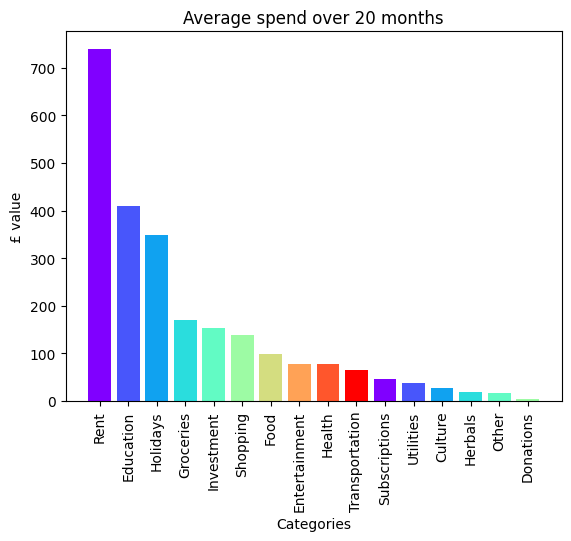

In [17]:
norm = plt.Normalize(0.5, 0.75)

x = np.arange(10)
y = np.random.rand(10)

cmap = plt.cm.get_cmap('rainbow')

plt.bar(raw_avg['s_cate'], raw_avg[0], color=cmap(np.linspace(0, 1, len(x))))
plt.xlabel("Categories")
plt.xticks(rotation=90)
plt.ylabel('£ value')
plt.title(f"Average spend over {len_of_time} months")


# Next things to do

1. Add weekly spend overlay to the Monthly totals graph - perhaps do this as violin plots? Kinda like crypto graphs
2. Be able to create your own categories
3. Be able to look into sub categories


In [20]:
master


,s_date,s_time,s_where,s_cate,s_subcate,s_price,Month,Year
0,2022-05-02,15:13:00,Tesco,Groceries,Tesco,9.70,5,2022
1,2022-05-02,15:14:00,Santander,Transportation,Bicycle,90.00,5,2022
2,2022-05-03,15:37:00,Tesco,Food,Snacks,3.20,5,2022
3,2022-05-03,22:19:00,RyanAir (Amsterdam),Holidays,Flights,90.82,5,2022
4,2022-05-03,22:19:00,EasyJet (Poland),Holidays,Flights,126.66,5,2022
...,...,...,...,...,...,...,...,...
1669,2023-10-21,15:50:00,Runners Needs,Shopping,Clothes,29.99,10,2023
1670,2023-10-21,15:53:00,Sainsbury,Groceries,Sainsbury,13.20,10,2023
1671,2023-10-21,19:03:00,Runners Needs,Shopping,Clothes,180.00,10,2023
1672,2023-10-21,00:00:00,Roman Road,Groceries,Roman Road,1.74,10,2023


In [42]:
master['s_date'][0].isocalendar()[:2]


(2022, 18)

In [43]:
master['week_num'] = master['s_date'].apply(lambda x: x.isocalendar()[:2])


In [44]:
master


,s_date,s_time,s_where,s_cate,s_subcate,s_price,Month,Year,week_num
0,2022-05-02,15:13:00,Tesco,Groceries,Tesco,9.70,5,2022,"(2022, 18)"
1,2022-05-02,15:14:00,Santander,Transportation,Bicycle,90.00,5,2022,"(2022, 18)"
2,2022-05-03,15:37:00,Tesco,Food,Snacks,3.20,5,2022,"(2022, 18)"
3,2022-05-03,22:19:00,RyanAir (Amsterdam),Holidays,Flights,90.82,5,2022,"(2022, 18)"
4,2022-05-03,22:19:00,EasyJet (Poland),Holidays,Flights,126.66,5,2022,"(2022, 18)"
...,...,...,...,...,...,...,...,...,...
1669,2023-10-21,15:50:00,Runners Needs,Shopping,Clothes,29.99,10,2023,"(2023, 42)"
1670,2023-10-21,15:53:00,Sainsbury,Groceries,Sainsbury,13.20,10,2023,"(2023, 42)"
1671,2023-10-21,19:03:00,Runners Needs,Shopping,Clothes,180.00,10,2023,"(2023, 42)"
1672,2023-10-21,00:00:00,Roman Road,Groceries,Roman Road,1.74,10,2023,"(2023, 42)"


<Axes: xlabel='week_num'>

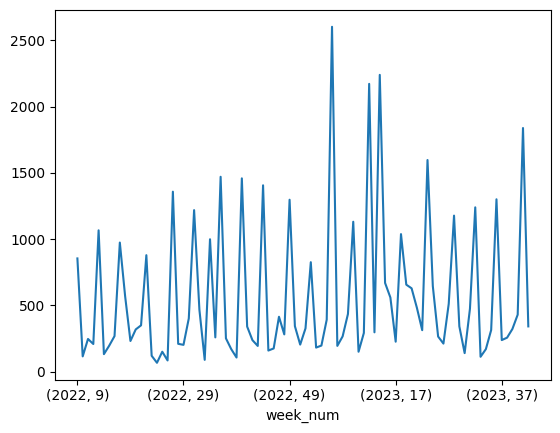

In [46]:
master.groupby('week_num')['s_price'].sum().plot()
